In [1]:
import json
import numpy as np
import os
import sys
from matplotlib import pyplot as plt

rootFolder = os.getcwd()
os.chdir(rootFolder)
print(rootFolder)
folder = os.listdir('morphologies/')

savedata = 1 # Save Netpyne and BBP soma_voltage

/home/fernando/Dropbox/Human_L23_NetPyNE


In [2]:
folder = [fldr[0:-4] for fldr in folder]
folder

['HL23PYR', 'HL23VIP', 'HL23PV', 'HL23SST']

In [3]:
# !nrnivmodl mod/

In [4]:
from netpyne import sim, specs
import pickle

cfg = specs.SimConfig()     

cfg.duration = 320 ## Duration of the sim, in ms  
cfg.dt = 0.05
cfg.seeds = {'conn': 4321, 'stim': 1234, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -70}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.5

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True
cfg.checkErrors = False

allpops = ['HL23PYR', 'HL23VIP', 'HL23PV', 'HL23SST']

cfg.recordCells = allpops  # which cells to record from
cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},                  
                    'V_dend_5': {'sec':'dend_5', 'loc':0.5, 'var':'v'},
                    }


## Dict with traces to record
cfg.recordStim = True
cfg.recordTime = True
cfg.recordStep = 0.05         


cfg.recordLFP = [[0, y, 0] for y in [-400]] # 1 elec on skull


cfg.simLabel = 'S1_Net'
cfg.saveFolder = '.'
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = False           	## Save json file
cfg.saveDataInclude = ['simConfig', 'netParams'] ## 'simData' , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = True			##  
cfg.saveCellConns = False		##  

cfg.analysis['plotTraces'] = {'include': allpops, 'figSize': (12, 4), 'timeRange': [180,cfg.duration], 'saveFig': False, 'overlay': True, 'oneFigPer': 'cell'}  # Plot recorded traces for this list of cells


#------------------------------------------------------------------------------
# Current inputs 
#------------------------------------------------------------------------------
cfg.addIClamp = 1

cfg.IClamp1 = {'pop': 'HL23PYR',  'sec': 'soma_0', 'loc': 0.5, 'start': 1000, 'dur': 1000, 'amp': 0.2}
cfg.IClamp2 = {'pop': 'HL23VIP', 'sec': 'soma_0', 'loc': 0.5, 'start': 700, 'dur': 25, 'amp': 0.2}
cfg.IClamp3 = {'pop': 'HL23PV', 'sec': 'soma_0', 'loc': 0.5, 'start': 900, 'dur': 25, 'amp': 0.2}
cfg.IClamp4 = {'pop': 'HL23SST', 'sec': 'soma_0', 'loc': 0.5, 'start': 1100, 'dur': 25, 'amp': 0.2}



In [5]:
#------------------------------------------------------------------------------
#
# NETWORK PARAMETERS
#
#------------------------------------------------------------------------------
netParams = specs.NetParams()   # object of class NetParams to store the network parameters
#------------------------------------------------------------------------------
# General network parameters
#------------------------------------------------------------------------------
cfg.scale = 1.0 # reduce size
cfg.sizeY = 2082.0
cfg.sizeX = 420.0 # r = 210 um
cfg.sizeZ = 420.0

netParams.scale = cfg.scale # Scale factor for number of cells
netParams.sizeX = cfg.sizeX # x-dimension (horizontal length) size in um
netParams.sizeY = cfg.sizeY # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = cfg.sizeZ # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume
   
# Layer	height (um)	height (norma)	from	to
# L1	165		    0.079		    0.000	0.079
# L2	149		    0.072		    0.079	0.151
# L3	353		    0.170		    0.151	0.320
# L4	190		    0.091		    0.320	0.412
# L5	525		    0.252		    0.412	0.664
# L6	700		    0.336		    0.664	1.000
# L23	502		    0.241		    0.079	0.320
# All	2082	    1.000	


cellModels = ['HH_full']

layer = {'1':[0.0, 0.079], '2': [0.079,0.151], '3': [0.151,0.320], '23': [0.079,0.320], '4':[0.320,0.412], '5': [0.412,0.664], '6': [0.664,1.0], 
'longS1': [2.2,2.3], 'longS2': [2.3,2.4]}  # normalized layer boundaries

#------------------------------------------------------------------------------
# Cell parameters
#------------------------------------------------------------------------------

for cellName in allpops:
    cellRule = netParams.importCellParams(label=cellName + '_rule', somaAtOrigin=True,
        conds={'cellType': cellName, 'cellModel': 'HH_full'},
        fileName='cellwrapper.py',
        cellName='loadCell_' + cellName,
        cellInstance = True,
        cellArgs={'cellName': cellName})



NeuronTemplate_HL23PYR[0]
NeuronTemplate_HL23VIP[0]
NeuronTemplate_HL23PV[0]
NeuronTemplate_HL23SST[0]


In [7]:
rotate_x = {}
rotate_y = {}
rotate_z = {}
rotate_x['HL23PYR'], rotate_x['HL23SST'], rotate_x['HL23PV'], rotate_x['HL23VIP'] = 1.57+1.5708, 1.77+1.5708, 1.26+1.5708, -1.57+1.5708
rotate_y['HL23PYR'], rotate_y['HL23SST'], rotate_y['HL23PV'], rotate_y['HL23VIP'] = 2.62, 2.77, 2.57, 3.57
rotate_z['HL23PYR'], rotate_z['HL23SST'], rotate_z['HL23PV'], rotate_z['HL23VIP'] = 0.0, 0.0, 0.0, 0.0


for cellName in netParams.cellParams.keys():

    cellType = netParams.cellParams[cellName]['conds']['cellType']

    x = rotate_x[cellType]
    y = rotate_y[cellType]
    z = rotate_z[cellType]

    for sectName in netParams.cellParams[cellName]['secs'].keys():

        sectParams_new = netParams.cellParams[cellName]['secs'][sectName]['geom']['pt3d']
        sectParams = []

        theta = -x
        rotation_x = np.array([[1, 0, 0],
                                       [0, np.cos(theta), -np.sin(theta)],
                                       [0, np.sin(theta), np.cos(theta)]])
        
        # print(cellName,sectName,len(sectParams_new))
        # print(sectParams_new)       
        
        for i in range(len(sectParams_new)):
            x3d, y3d, z3d, L3d = sectParams_new[i]
            rel_pos = x3d, y3d, z3d

            # print(rel_pos)        
            rel_pos = np.dot(rel_pos, rotation_x)
            # print(rel_pos)
            pt3d = (rel_pos[0],rel_pos[1] , rel_pos[2], L3d)
            sectParams.append(pt3d)

        netParams.cellParams[cellName]['secs'][sectName]['geom']['pt3d'] = sectParams


        sectParams_new = netParams.cellParams[cellName]['secs'][sectName]['geom']['pt3d']
        sectParams = []

        phi = -y
        rotation_y = np.array([[np.cos(phi), 0, np.sin(phi)],
                                       [0, 1, 0],
                                       [-np.sin(phi), 0, np.cos(phi)]])
        
        for i in range(len(sectParams_new)):
            x3d, y3d, z3d, L3d = sectParams_new[i]
            rel_pos = x3d, y3d, z3d

            # print(rel_pos)        
            rel_pos = np.dot(rel_pos, rotation_y)
            # print(rel_pos)
            pt3d = (rel_pos[0],rel_pos[1] , rel_pos[2], L3d)
            sectParams.append(pt3d)

        netParams.cellParams[cellName]['secs'][sectName]['geom']['pt3d'] = sectParams


        sectParams_new = netParams.cellParams[cellName]['secs'][sectName]['geom']['pt3d']
        sectParams = []

        gamma = -z
        rotation_z = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                                       [np.sin(gamma), np.cos(gamma), 0],
                                       [0, 0, 1]])
    
        for i in range(len(sectParams_new)):
            x3d, y3d, z3d, L3d = sectParams_new[i]
            rel_pos = x3d, y3d, z3d

            # print(rel_pos)        
            rel_pos = np.dot(rel_pos, rotation_z)
            # print(rel_pos)
            pt3d = (rel_pos[0],rel_pos[1] , rel_pos[2], L3d)
            sectParams.append(pt3d)

        netParams.cellParams[cellName]['secs'][sectName]['geom']['pt3d'] = sectParams

In [8]:
#------------------------------------------------------------------------------
# Cell parameters 
#------------------------------------------------------------------------------

for cellName in netParams.cellParams.keys():
        
        axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, soma_pt3d_diam =  netParams.cellParams[cellName]['secs']['soma_0']['geom']['pt3d'][-1]
        axon_pt3d_diam =  netParams.cellParams[cellName]['secs']['axon_0']['geom']['diam']
        axon_pt3d_L =  netParams.cellParams[cellName]['secs']['axon_0']['geom']['L']

        netParams.cellParams[cellName]['secs']['axon_0']['geom']['pt3d'] = [(axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, axon_pt3d_diam),
                                                                          (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L/2.0, axon_pt3d_z, axon_pt3d_diam),
                                                                          (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L, axon_pt3d_z, axon_pt3d_diam)]

        axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, soma_pt3d_diam =  netParams.cellParams[cellName]['secs']['axon_0']['geom']['pt3d'][-1]
        axon1_pt3d_diam =  netParams.cellParams[cellName]['secs']['axon_1']['geom']['diam']
        axon1_pt3d_L =  netParams.cellParams[cellName]['secs']['axon_1']['geom']['L']

        netParams.cellParams[cellName]['secs']['axon_1']['geom']['pt3d'] = [(axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon1_pt3d_diam),
                                                                          (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L/2.0, axon1_pt3d_z, axon1_pt3d_diam),
                                                                          (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L, axon1_pt3d_z, axon1_pt3d_diam)] 
        
        if 'myelin_0' in netParams.cellParams[cellName]['secs'].keys():

                if 'myelin_0' not in netParams.cellParams[cellName]['secLists']['all']:
                        netParams.cellParams[cellName]['secLists']['all'].append('myelin_0')

                if 'myelin_0' not in netParams.cellParams[cellName]['secLists']['axonal']:                        
                        netParams.cellParams[cellName]['secLists']['axonal'].append('myelin_0')

                myelin0_pt3d_x, myelin0_pt3d_y, myelin0_pt3d_z, soma_pt3d_diam =  netParams.cellParams[cellName]['secs']['axon_1']['geom']['pt3d'][-1]
                myelin0_pt3d_diam =  netParams.cellParams[cellName]['secs']['myelin_0']['geom']['diam']
                myelin0_pt3d_L =  netParams.cellParams[cellName]['secs']['myelin_0']['geom']['L']

                netParams.cellParams[cellName]['secs']['myelin_0']['geom']['pt3d'] = [(myelin0_pt3d_x, myelin0_pt3d_y, myelin0_pt3d_z, myelin0_pt3d_diam),
                                                                                (myelin0_pt3d_x, myelin0_pt3d_y+myelin0_pt3d_L/2.0, myelin0_pt3d_z, myelin0_pt3d_diam),
                                                                                (myelin0_pt3d_x, myelin0_pt3d_y+myelin0_pt3d_L, myelin0_pt3d_z, myelin0_pt3d_diam)] 
        

In [9]:
for cellName in netParams.cellParams.keys():

    netParams.renameCellParamsSec(label=cellName, oldSec='myelin_0', newSec='axon_2')      
           
    for secname2 in netParams.cellParams[cellName]['secLists'].keys():
     if 'myelin_0' in netParams.cellParams[cellName]['secLists'][secname2]:
       print('old ->',cellName,secname2,netParams.cellParams[cellName]['secLists'][secname2][-1])
       netParams.cellParams[cellName]['secLists'][secname2][-1] = 'axon_2'    
       print('new ->',cellName,secname2,netParams.cellParams[cellName]['secLists'][secname2][-1])



old -> HL23PYR_rule all myelin_0
new -> HL23PYR_rule all axon_2
old -> HL23PYR_rule axonal myelin_0
new -> HL23PYR_rule axonal axon_2
old -> HL23SST_rule all myelin_0
new -> HL23SST_rule all axon_2
old -> HL23SST_rule axonal myelin_0
new -> HL23SST_rule axonal axon_2


In [11]:
#------------------------------------------------------------------------------
# Population parameters
#------------------------------------------------------------------------------
# cell_num = [800, 50, 70, 80]
cell_num = [8, 2, 2, 2]

for ii,cellName in enumerate(['HL23PYR', 'HL23SST', 'HL23PV', 'HL23VIP']):
    netParams.popParams[cellName] = {'cellType': cellName, 'cellModel': 'HH_full', 'ynormRange': layer['23'], 'numCells': cell_num[ii]} 

# #------------------------------------------------------------------------------
# #  extracellular mechs
# #------------------------------------------------------------------------------
for celltyp in netParams.cellParams.keys():
    label = []
    for secname in netParams.cellParams[celltyp]['secs'].keys():
        netParams.cellParams[celltyp]['secs'][secname]['mechs']['extracellular'] = {}

#------------------------------------------------------------------------------
# Current inputs (IClamp)
#------------------------------------------------------------------------------
if cfg.addIClamp:
     for key in [k for k in dir(cfg) if k.startswith('IClamp')]:
        params = getattr(cfg, key, None)
        [pop,sec,loc,start,dur,amp] = [params[s] for s in ['pop','sec','loc','start','dur','amp']]

        #cfg.analysis['plotTraces']['include'].append((pop,0))  # record that pop

        # add stim source
        netParams.stimSourceParams[key] = {'type': 'IClamp', 'delay': start, 'dur': dur, 'amp': amp}

        # connect stim source to target
        netParams.stimTargetParams[key+'_'+pop] =  {
            'source': key, 
            'conds': {'pop': pop},
            'sec': sec, 
            'loc': loc}

        
# netParams.rotateCellsRandomly = True
# sim.createSimulateAnalyze(netParams, cfg)     

## Create Network

In [ ]:

# ['HL23PYR', 'HL23SST', 'HL23PV', 'HL23VIP']

# Synaptic mechanism parameters
netParams.synMechParams['AMPA'] = {'mod': 'Exp2Syn', 'tau1': 0.05, 'tau2': 5.3, 'e': 0}  # AMPA
netParams.synMechParams['NMDA'] = {'mod': 'Exp2Syn', 'tau1': 0.15, 'tau2': 15, 'e': 0}  # NMDA
netParams.synMechParams['GABAA'] = {'mod': 'Exp2Syn', 'tau1': 0.07, 'tau2': 9.1, 'e': -80}  # GABAA
netParams.synMechParams['GABAB'] = {'mod': 'Exp2Syn', 'tau1': 0.07, 'tau2': 9.1, 'e': -80}  # GABAB


# Stimulation parameters
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 10, 'noise': 0.5, 'start': 1}
netParams.stimTargetParams['bkg->PYR'] = {'source': 'bkg', 'conds': {'pop': 'HL23PYR'}, 'weight': 0.1, 'delay': 'uniform(1,5)'}


# Connectivity parameters

# # Excitatory

netParams.connParams['HL23PYR->HL23PYR'] = {
    'preConds': {'pop': 'HL23PYR'}, 'postConds': {'pop': 'HL23PYR'},
    'weight': 0.002,                    # weight of each connection
    'synMech': 'AMPA',
    'delay': 0.5,     # 
    'probability': 0.15907}    #


netParams.connParams['HL23PYR->HL23SST'] = {
    'preConds': {'pop': 'HL23PYR'}, 'postConds': {'pop': 'HL23SST'},
    'weight': 0.002,                    # weight of each connection
    'synMech': 'AMPA',
    'delay': 0.5,     # 
    'probability': 0.3}    #


# Inhibitory
netParams.connParams['HL23PV->HL23PYR'] = {
    'preConds': {'pop': 'HL23PV'}, 'postConds': {'pop': 'HL23PYR'},
    'weight': 0.002,                    # weight of each connection
    'synMech': 'GABAA',
    'delay': 0.5,     # 
    'probability': 0.15907}    #


netParams.connParams['HL23PV->HL23SST'] = {
    'preConds': {'pop': 'HL23PV'}, 'postConds': {'pop': 'HL23SST'},
    'weight': 0.002,                    # weight of each connection
    'synMech': 'GABAA',
    'delay': 0.5,     # 
    'probability': 0.3}    #



In [ ]:
# for i, pre in enumerate(['HL23PYR', 'HL23SST', 'HL23PV', 'HL23VIP']):
#     for j, post in enumerate(['HL23PYR', 'HL23SST', 'HL23PV', 'HL23VIP']):


        # 'L5_TPC:L5_TPC' ->  pre:post

        # #E2 -> syn 134
        # netParams.synMechParams['L5_TPC:L5_TPC'] = {'mod': 'ProbAMPANMDA', 'mod': 'ProbAMPANMDA',
        #                                           'Dep': ,
        #                                           'Fac': ,
        #                                           'Use': ,
        #                                           'tau_d_AMPA': ,
        #                                           'NMDA_ratio': }

        # if "PYR" in pre:
        #     circuit_params["syn_params"][pre+post] = {'tau_r_AMPA': 0.3, 'tau_d_AMPA': 3, 'tau_r_NMDA': 2,
        #                                               'tau_d_NMDA': 65, 'e': 0, 'u0':0,
        #                                               'Dep': circuit_params["Depression"].at[pre, post],
        #                                               'Fac': circuit_params["Facilitation"].at[pre, post],
        #                                               'Use': circuit_params["Use"].at[pre, post],
        #                                               'gmax': circuit_params["syn_cond"].at[pre, post]}
        # else:
        #     circuit_params["syn_params"][pre+post] = {'tau_r': 1, 'tau_d': 10, 'e': -80, 'u0':0,
        #                                               'Dep': circuit_params["Depression"].at[pre, post],
        #                                               'Fac': circuit_params["Facilitation"].at[pre, post],
        #                                               'Use': circuit_params["Use"].at[pre, post],
        #                                               'gmax': circuit_params["syn_cond"].at[pre, post]}
        # circuit_params["multi_syns"][pre+post] = {'loc':int(circuit_params["n_cont"].at[pre, post]),'scale':0}




        # ## Cell connectivity rules
        # netParams.connParams['pre->post'] = { 
        #         'preConds': {'pop': 'presyn'},
        #         'postConds': {'pop': list(netParams.popParams.keys())[0:-1]},
        #         'sec': 'basal',                  # target postsyn section
        #         'synMech': 'L5_TPC:L5_TPC',              # target synaptic mechanism
        #         'weight': np.mean(connsinfo.get(connsinfo['@source_node']==172877)['conductance'].values),                 # synaptic weight 
        #         'synsPerConn': 6,
        #         'delay': 0.5}      

# for i, pre in enumerate(network.population_names):
#     for j, post in enumerate(network.population_names):
#         connectivity = network.get_connectivity_rand(
#                         pre=pre,
#                         post=post,
#                         connprob=0 if no_connectivity else circuit_params["conn_probs"].at[pre, post])
#         (conncount, syncount) = network.connect(
#                         pre=pre, post=post,
#                         connectivity=connectivity,
#                         syntype=E_syn if "PYR" in pre else I_syn,
#                         synparams=circuit_params["syn_params"][pre+post],
#                         weightfun=local_state.normal,
#                         weightargs={'loc':1, 'scale':0},
#                         minweight=1,
#                         delayfun=local_state.normal,
#                         delayargs={'loc':0.5, 'scale':0},
#                         mindelay=0.5,
#                         multapsefun=local_state.normal,
#                         multapseargs=circuit_params["multi_syns"][pre+post],

#                         syn_pos_args=syn_pos[circuit_params["Syn_pos"].at[pre,post]])


In [ ]:
# netParams.addConnParams(None, {'preConds': {'cellType': ['IT','CT'], 'ynorm': [0.1,0.2]},
# 'postConds': {'cellType': 'IT', 'ynorm': [0.1,0.2]},
# 'synMech': 'AMPA',
# 'probability': 0.09263,
# 'weight': 0.64,
# 'delay': 'defaultDelay+dist_3D/propVelocity'})

# # Connectivity parameters
# netParams.connParams['HL23PYR->HL23PYR'] = {
#     'preConds': {'pop': 'HL23PYR'}, 'postConds': {'pop': 'HL23PYR'},
#     'weight': 0.002,                    # weight of each connection
#     'delay': '0.2+normal(13.0,1.4)',     # delay min=0.2, mean=13.0, var = 1.4
#     'threshold': 10,                    # threshold
#     'probability': 0.15907}    #

## Run 

In [12]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.defineCellShapes()  # in case some cells had stylized morphologies without 3d pts
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)


Start time:  2024-07-12 13:03:37.734511

Creating network of 4 cell populations on 1 hosts...
  Number of cells on node 0: 14 
  Done; cell creation time = 0.45 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 14 
  Done; cell stims creation time = 0.00 s.
Recording 56 traces of 4 types on node 0


{spkt: Vector[0], spkid: Vector[1], stims: {cell_0: {}, cell_1: {}, cell_2: {}, cell_3: {}, cell_4: {}, cell_5: {}, cell_6: {}, cell_7: {}, cell_8: {}, cell_9: {}, cell_10: {}, cell_11: {}, cell_12: {}, cell_13: {}}, V_soma: {cell_0: Vector[44], cell_1: Vector[47], cell_2: Vector[50], cell_3: Vector[53], cell_4: Vector[56], cell_5: Vector[59], cell_6: Vector[62], cell_7: Vector[65], cell_8: Vector[68], cell_9: Vector[71], cell_10: Vector[74], cell_11: Vector[77], cell_12: Vector[80], cell_13: Vector[83]}, V_axon_0: {cell_0: Vector[45], cell_1: Vector[48], cell_2: Vector[51], cell_3: Vector[54], cell_4: Vector[57], cell_5: Vector[60], cell_6: Vector[63], cell_7: Vector[66], cell_8: Vector[69], cell_9: Vector[72], cell_10: Vector[75], cell_11: Vector[78], cell_12: Vector[81], cell_13: Vector[84]}, V_dend_5: {cell_0: Vector[46], cell_1: Vector[49], cell_2: Vector[52], cell_3: Vector[55], cell_4: Vector[58], cell_5: Vector[61], cell_6: Vector[64], cell_7: Vector[67], cell_8: Vector[70], ce

In [13]:
# for sec in netParams.cellParams[celltyp]['secLists']['all']:
#     if netParams.cellParams[celltyp]['secs'][sec]['geom']['nseg']>1:
#         print(sec,netParams.cellParams[celltyp]['secs'][sec]['geom']['nseg'],np.shape(netParams.cellParams[celltyp]['secs'][sec]['geom']['pt3d']))


 {'cellType': 'HL23PYR', 'cellModel': 'HH_full', 'pop': 'HL23PYR', 'xnorm': 0.8129808839396551, 'ynorm': 0.2188838392873565, 'znorm': 0.8164231911907041, 'x': 341.4519712546551, 'y': 455.71615339627624, 'z': 342.8977403000957}
['soma_0', 'dend_0', 'dend_1', 'dend_2', 'dend_3', 'dend_4', 'dend_5', 'dend_6', 'dend_7', 'dend_8', 'dend_9', 'dend_10', 'dend_11', 'dend_12', 'dend_13', 'dend_14', 'dend_15', 'dend_16', 'dend_17', 'dend_18', 'dend_19', 'dend_20', 'dend_21', 'dend_22', 'dend_23', 'dend_24', 'dend_25', 'dend_26', 'dend_27', 'dend_28', 'dend_29', 'apic_0', 'apic_1', 'apic_2', 'apic_3', 'apic_4', 'apic_5', 'apic_6', 'apic_7', 'apic_8', 'apic_9', 'apic_10', 'apic_11', 'apic_12', 'apic_13', 'apic_14', 'apic_15', 'apic_16', 'apic_17', 'apic_18', 'apic_19', 'apic_20', 'apic_21', 'apic_22', 'apic_23', 'apic_24', 'apic_25', 'apic_26', 'apic_27', 'apic_28', 'apic_29', 'apic_30', 'apic_31', 'apic_32', 'apic_33', 'apic_34', 'apic_35', 'apic_36', 'apic_37', 'apic_38', 'apic_39', 'apic_40', 

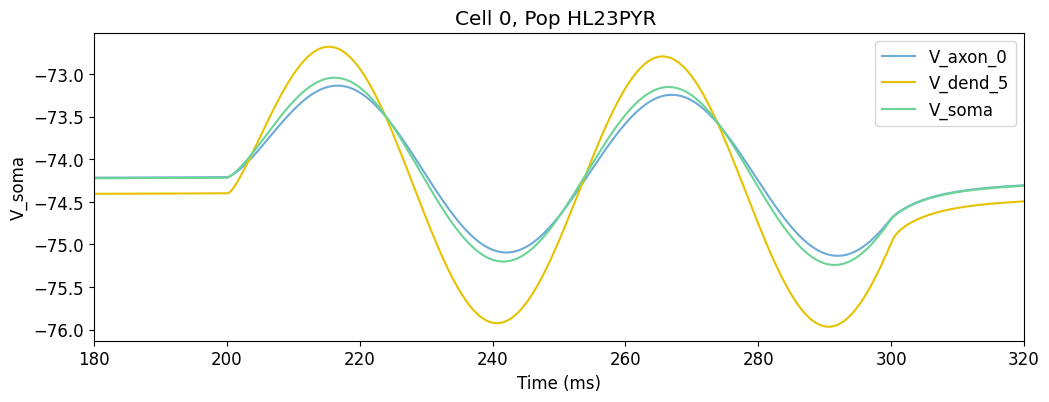

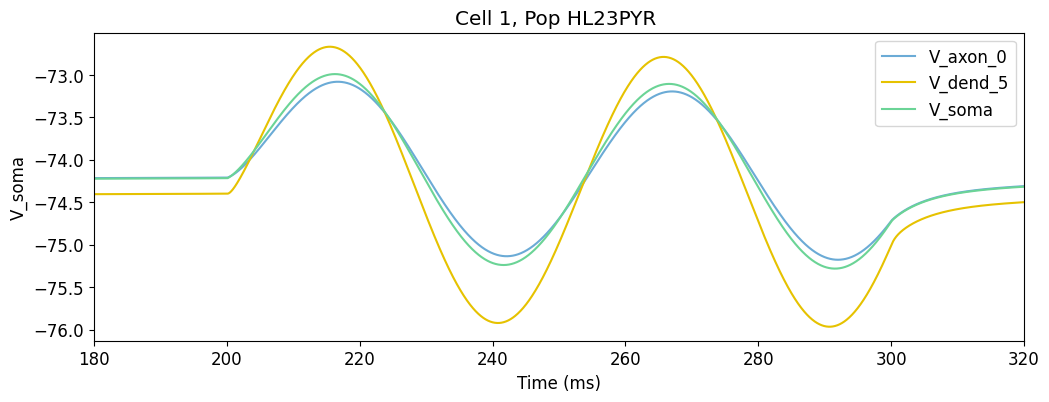

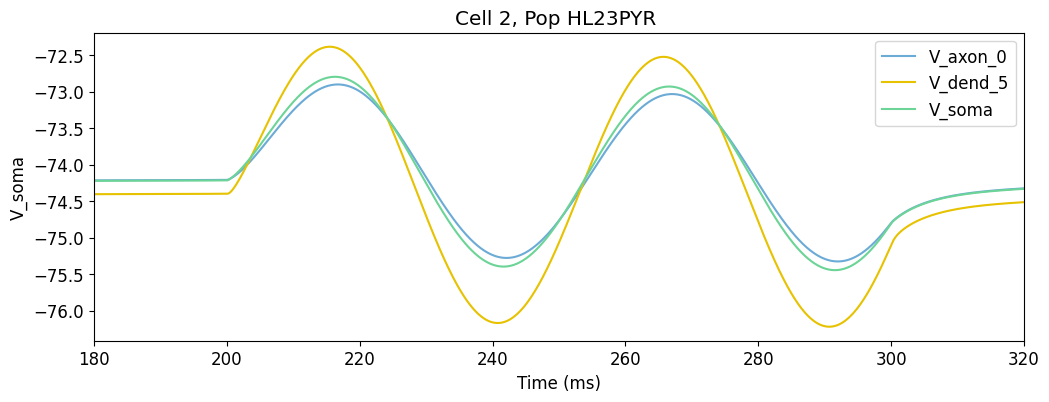

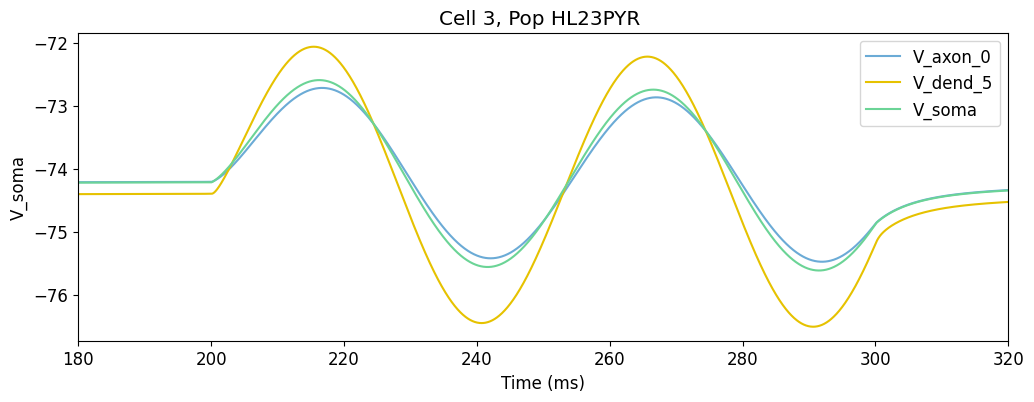

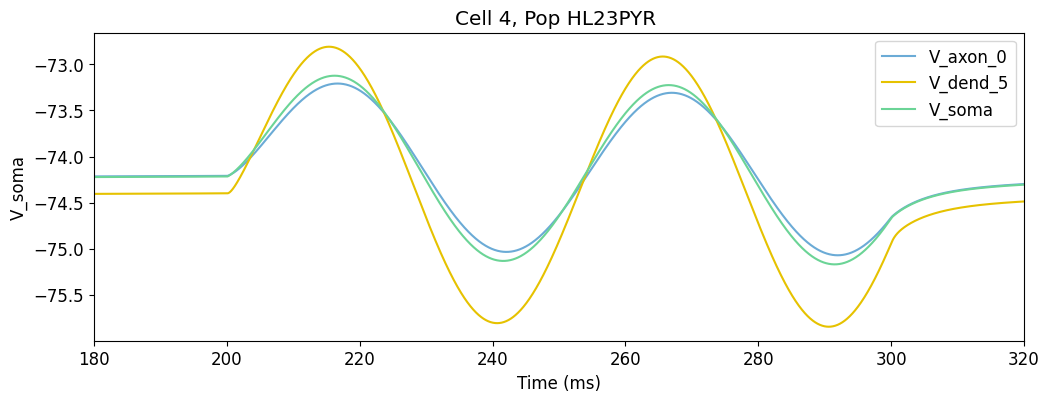

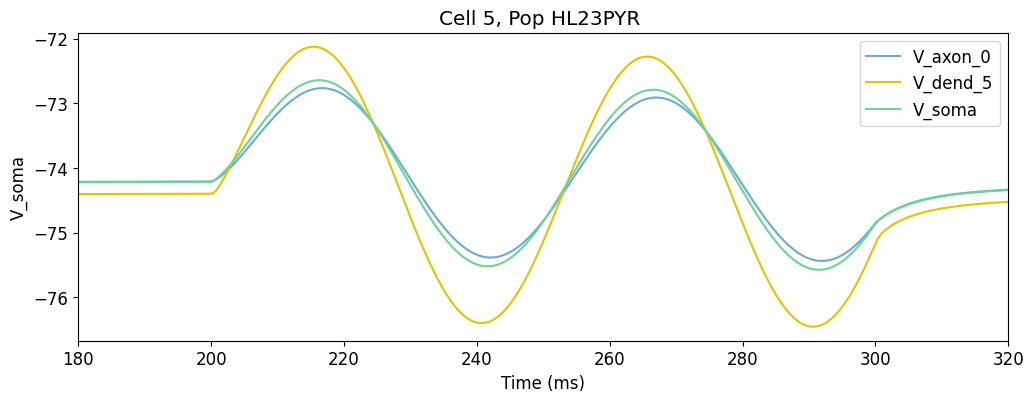

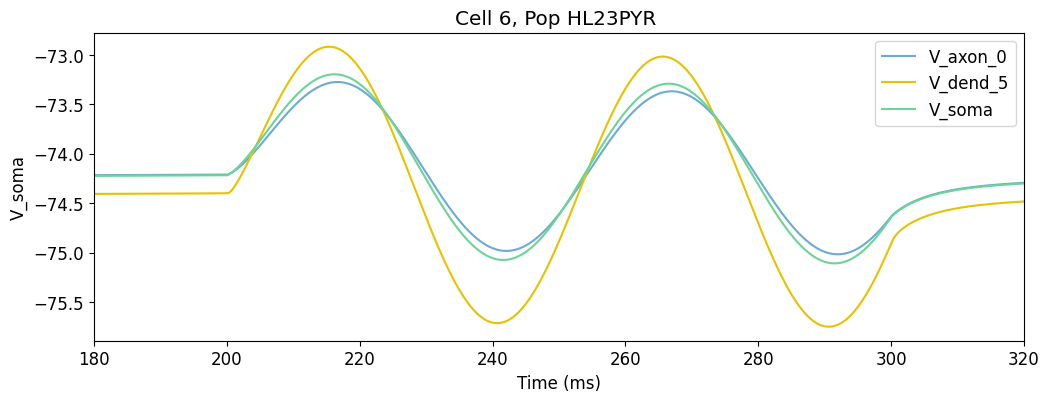

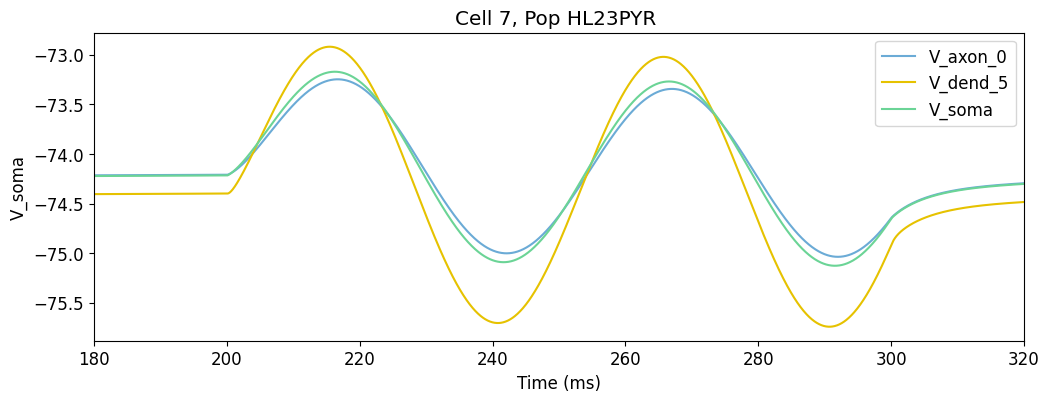

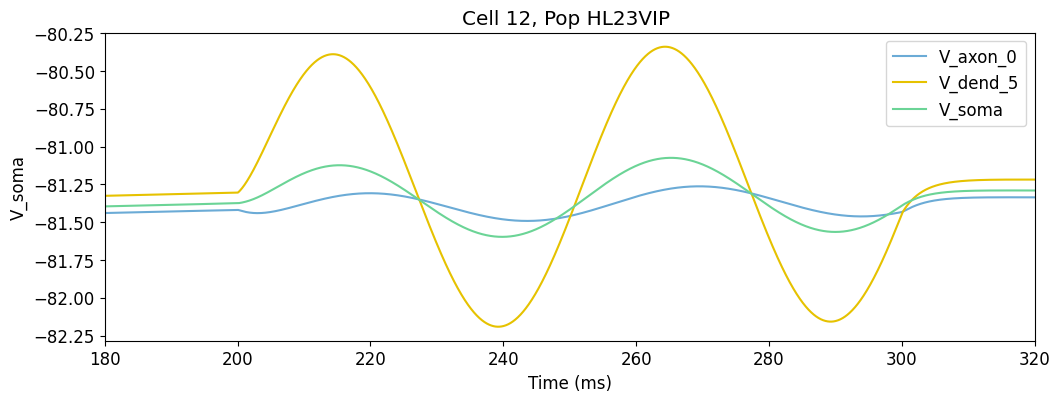

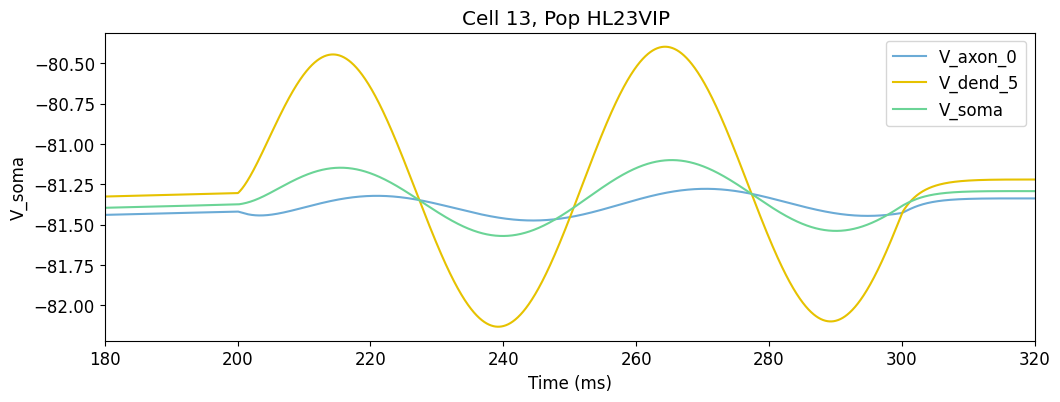

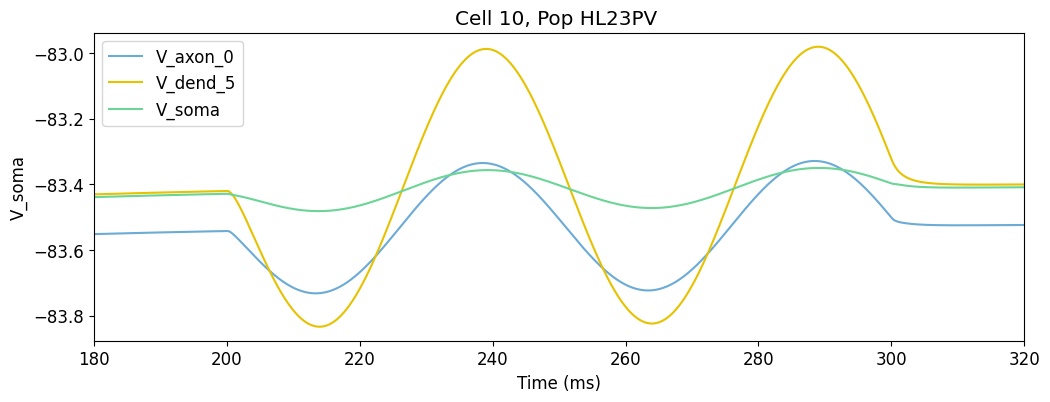

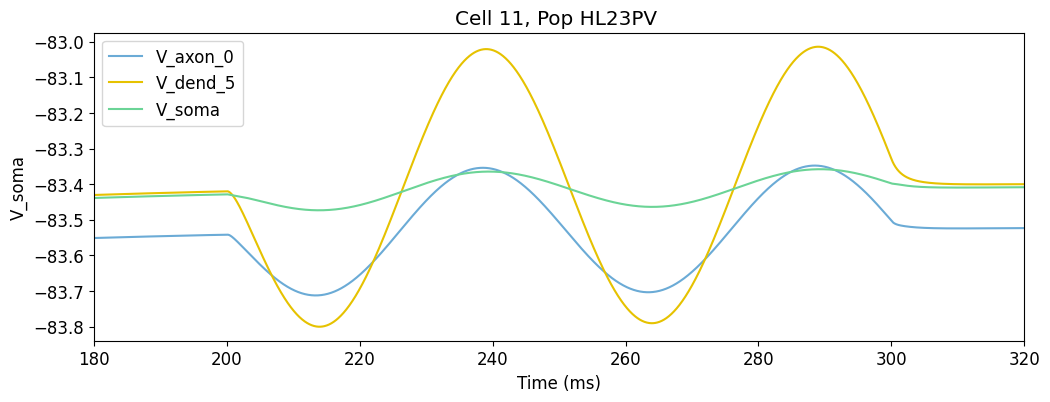

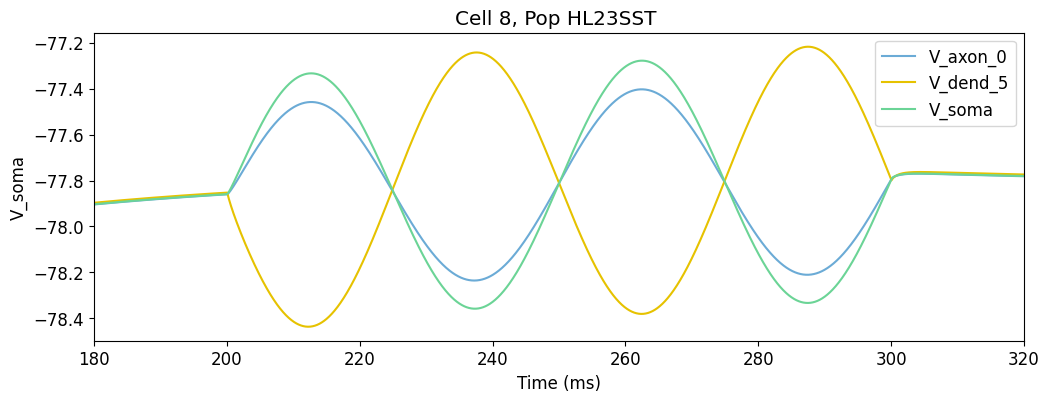

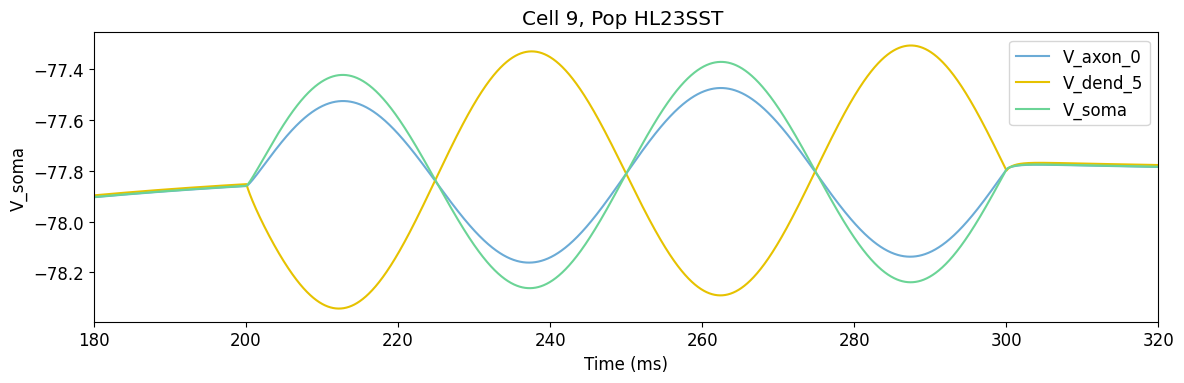

  Done; plotting time = 2.11 s

Total time = 139.17 s
Plotting 3D cell shape ...


(<Figure size 640x480 with 1 Axes>, {})

In [14]:
def collect_pt3d(self, section):
        """        collect the pt3d info, for each section
        """
        n3dsec = 0
        r3dsec = np.zeros(3)
        for sec in [sec for secName, sec in self.secs.items() if section in secName]:
            sec['hObj'].push()
            n3d = int(neuron.h.n3d())  # get number of n3d points in each section
            # print("get number of n3d points in each section",n3d)
            r3d = np.zeros((3, n3d))  # to hold locations of 3D morphology for the current section
            n3dsec += n3d

            for i in range(n3d):
                r3dsec[0] += neuron.h.x3d(i)
                r3dsec[1] += neuron.h.y3d(i)
                r3dsec[2] += neuron.h.z3d(i)
            
            neuron.h.pop_section()

        r3dsec /= n3dsec
        
        return r3dsec
    
def getSecsPos(self, secList):
        """        Get Secs position
        """
        x3d, y3d, z3d = [], [], []
        
        for secName in secList:
            # print(secName)
            r3dsec = collect_pt3d(self, secName)
            # print(secName, r3dsec)
            
            x3d.append(r3dsec[0])
            y3d.append(r3dsec[1])
            z3d.append(r3dsec[2])
            
        return x3d, y3d, z3d
    
def insert_v_ext(self, v_ext, t_ext):

    self.t_ext = neuron.h.Vector(t_ext)
    self.v_ext = []
    for v in v_ext:
        self.v_ext.append(neuron.h.Vector(v))
    
    # play v_ext into e_extracellular reference
    i = 0
    for secName, sec in self.secs.items(): 
        # print(secName,i)
        for seg in sec['hObj']:
                self.v_ext[i].play(seg._ref_e_extracellular, self.t_ext)
        i += 1
  
def make_extracellular_stimuli(acs_params, self, secList):
    """ Function to calculate and apply external potential """
    x0, y0, z0 = acs_params['position']
    ext_field = np.vectorize(lambda x, y, z: 1 / (4 * np.pi *
                            (acs_params['sigma'] * 
                            np.sqrt((x0 - x)**2 + (y0 - y)**2 + (z0 - z)**2) + skull_attenuation)))

    stimstart = acs_params['stimstart']
    stimend = acs_params['stimend']
    stimdif = stimend-stimstart

    # MAKING THE EXTERNAL FIELD
    n_tsteps = int(stimdif / cfg.dt + 1)
    n_start = int(stimstart/cfg.dt)
    n_end = int(stimend/cfg.dt + 1)
    t = np.arange(start=n_start, stop=n_end) * cfg.dt
    pulse = acs_params['amp'] * 1000. * \
        np.sin(2 * np.pi * acs_params['frequency'] * t / 1000)

    totnsegs = len(secList)    
    v_cell_ext = np.zeros((totnsegs, n_tsteps))    
    v_cell_ext[:, :] = ext_field(getSecsPos(metype,secList)[0], -1*np.array(getSecsPos(metype, secList)[1]), 
                                 getSecsPos(metype,secList)[2]).reshape(totnsegs, 1) * pulse.reshape(1, n_tsteps)
    
    insert_v_ext(self, v_cell_ext, t)

    return v_cell_ext, self


# The parameters of the extracellular point current source
acs_params = {'position': [210.0, -1710.0, 210.0],  # um # y = [pia, bone]
              'amp': 400.,  # uA,
              'stimstart': 200,  # ms
              'stimend': 300,  # ms
              'frequency': 20,  # Hz
              'sigma': 0.57  # decay constant S/m
              }

skull_attenuation = 0.01*710 #conductivity of bone(S/m) * thickness of rat skull um

#Add extracellular stim
for c,metype in enumerate(sim.net.cells):
    if 'presyn' not in metype.tags['pop']:
        print("\n", metype.tags)
        secList = [secs for secs in metype.secs.keys() if "pt3d" in metype.secs[secs]['geom']]
        print(secList)
        v_cell_ext, cell = make_extracellular_stimuli(acs_params, metype,secList)


sim.runSim()                      			# run parallel Neuron simulation  
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc
sim.analysis.plotShape()  

(56, 2001)


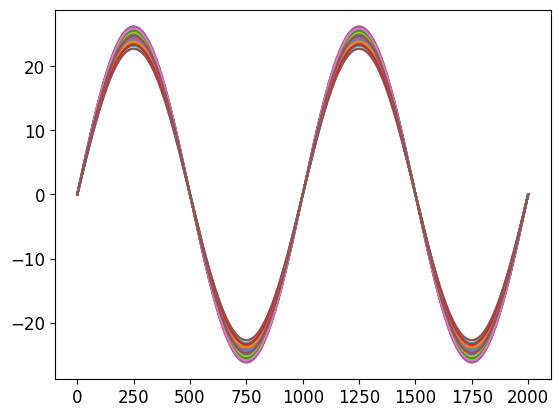

In [15]:
print(np.shape(v_cell_ext))
for v in v_cell_ext:
    plt.plot(v)


 {'cellType': 'HL23PYR', 'cellModel': 'HH_full', 'pop': 'HL23PYR', 'xnorm': 0.8129808839396551, 'ynorm': 0.2188838392873565, 'znorm': 0.8164231911907041, 'x': 341.4519712546551, 'y': 455.71615339627624, 'z': 342.8977403000957}

 {'cellType': 'HL23PYR', 'cellModel': 'HH_full', 'pop': 'HL23PYR', 'xnorm': 0.19878165176065316, 'ynorm': 0.23056967216833268, 'znorm': 0.8236536134452078, 'x': 83.48829373947433, 'y': 480.04605745446867, 'z': 345.9345176469873}

 {'cellType': 'HL23PYR', 'cellModel': 'HH_full', 'pop': 'HL23PYR', 'xnorm': 0.4278735665129119, 'ynorm': 0.16422415501316445, 'znorm': 0.5795826943548353, 'x': 179.706897935423, 'y': 341.91469073740836, 'z': 243.42473162903084}

 {'cellType': 'HL23PYR', 'cellModel': 'HH_full', 'pop': 'HL23PYR', 'xnorm': 0.6937900312867352, 'ynorm': 0.08656046284349625, 'znorm': 0.6107632901946369, 'x': 291.3918131404288, 'y': 180.2188836401592, 'z': 256.5205818817475}

 {'cellType': 'HL23PYR', 'cellModel': 'HH_full', 'pop': 'HL23PYR', 'xnorm': 0.695498

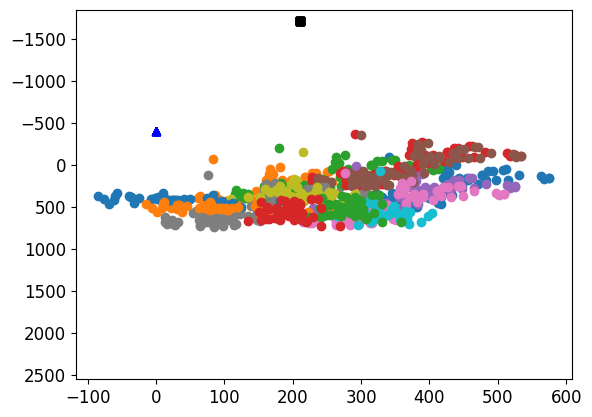

In [16]:
#Add extracellular stim
for c,metype in enumerate(sim.net.cells):
    if 'presyn' not in metype.tags['pop']:
        print("\n", metype.tags)
        plt.plot(0,-400,'b^')
        plt.plot(acs_params['position'][0],acs_params['position'][1],'ks')
        secList = [secs for secs in metype.secs.keys() if "pt3d" in metype.secs[secs]['geom']]
        plt.plot(np.array(getSecsPos(metype, secList)[0]),-1*np.array(getSecsPos(metype, secList)[1]),'o')
        plt.ylim(2550,-1850)
        # print(np.array(getSecsPos(cell, secList)[0]).mean(axis=-1),-1*np.array(getSecsPos(cell, secList)[1]).mean(axis=-1),np.array(getSecsPos(cell, secList)[2]).mean(axis=-1))

Plotting LFP electrode locations...
Plotting 3D cell shape ...
Preparing LFP data...
Plotting LFP time series...


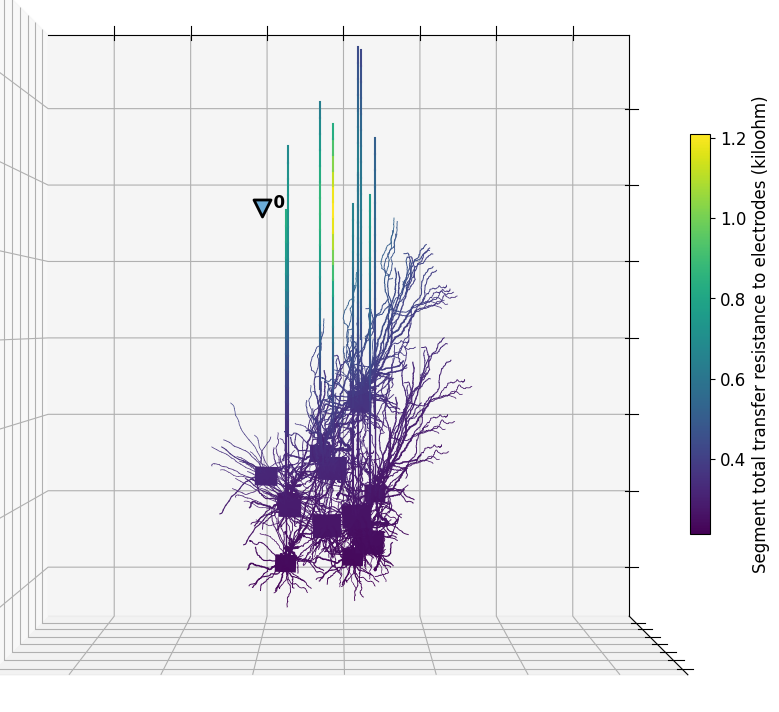

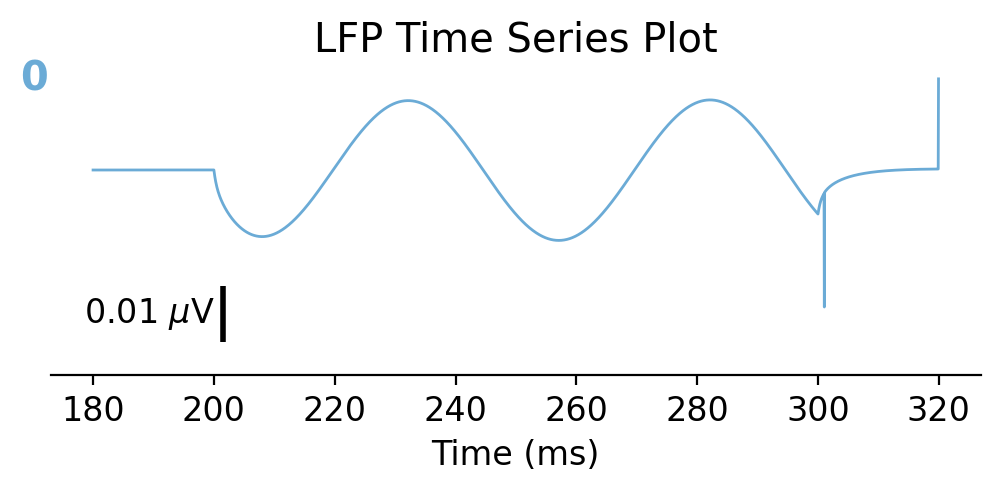

In [17]:
sim.analysis.plotLFP(**{'plots': ['locations'], 
        'figSize': (8,8), 
        'saveData': False, 
        'saveFig': False, 'showFig': False, 'dpi': 100})

sim.analysis.plotLFP(**{'plots': ['timeSeries'], 
        'electrodes': [0], #'avg', 
        'timeRange': [180, cfg.duration], 
        'figSize': (6,2), 'saveFig': False, 'showFig': False})

In [18]:
list(sim.simData['V_soma'].keys())[0]


'cell_0'

Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...


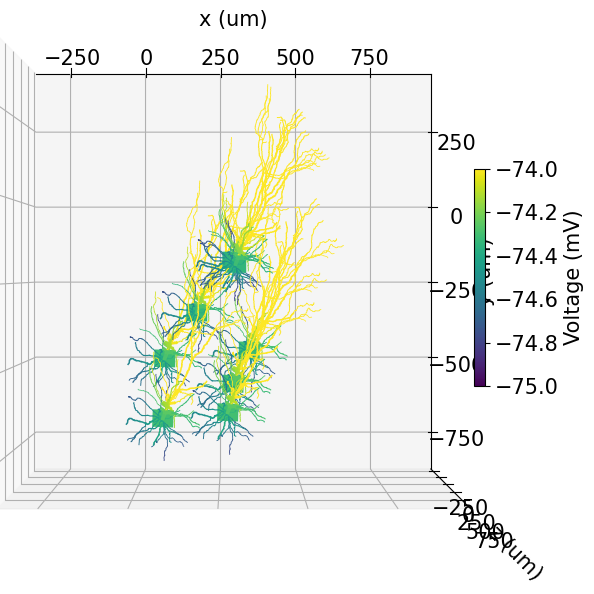

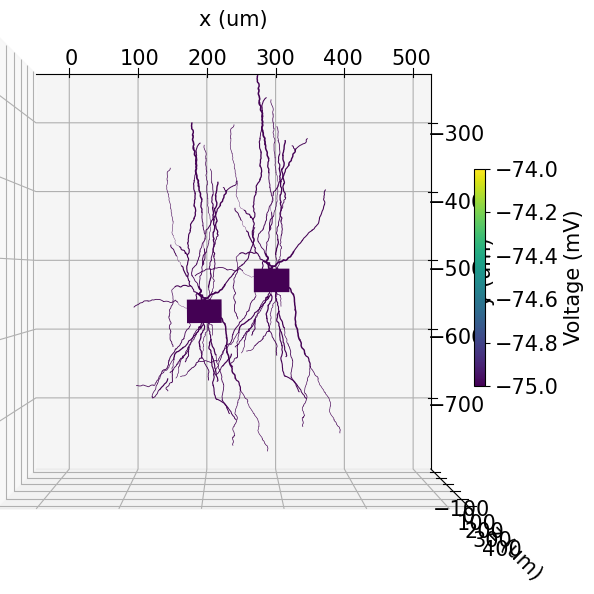

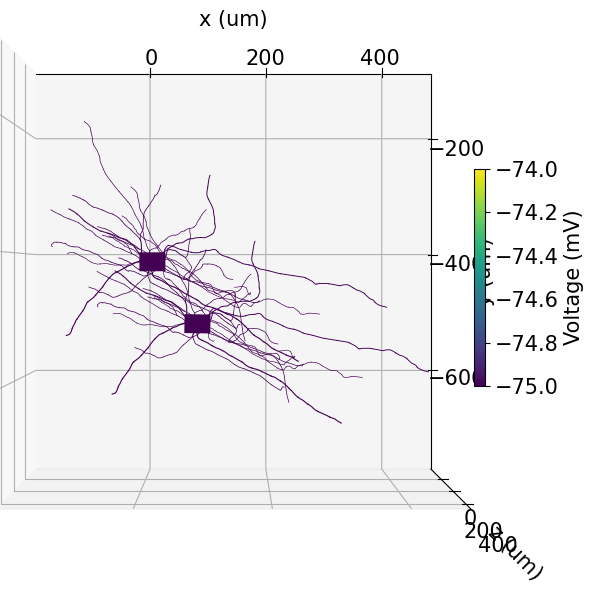

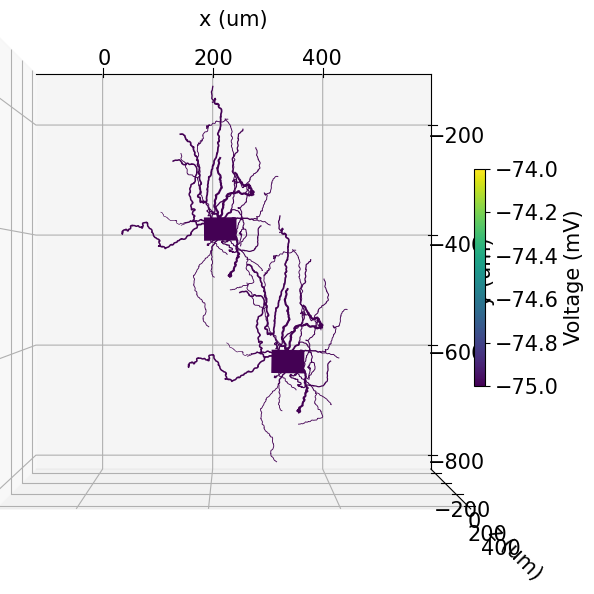

In [26]:
for cn,cell_name in enumerate(['HL23PYR', 'HL23VIP', 'HL23PV', 'HL23SST']):      
# for cn,cell_name in enumerate(['HL23PYR']):               

    sim.analysis.plotShape(includePre=[cell_name], includePost=[cell_name], includeAxon=False, showSyns=False, showElectrodes=False,
        cvar= 'voltage', dist=0.6, elev=90, azim=-90, 
        axisLabels=True, synStyle='o', 
        clim= [-75,-74], showFig=False, synSize=2)

Plotting recorded cell traces ... trace


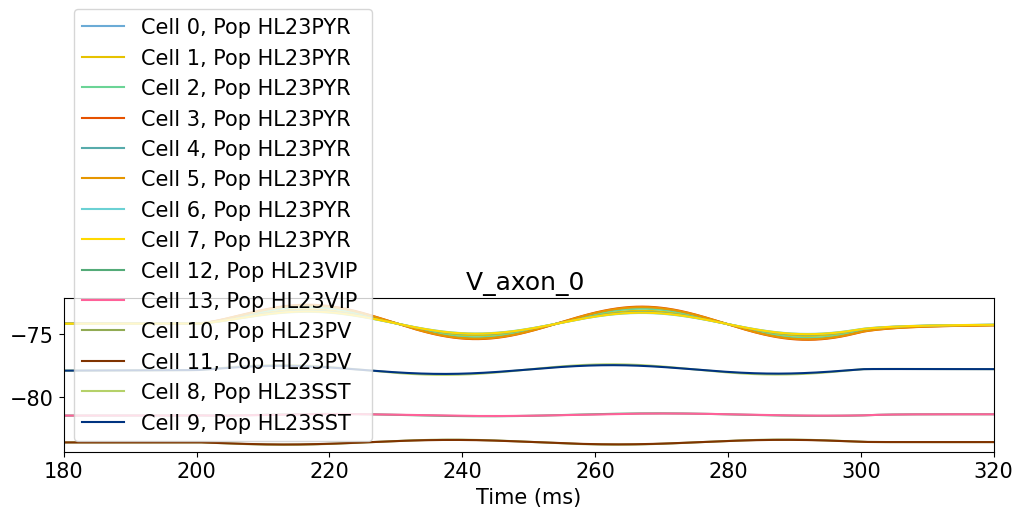

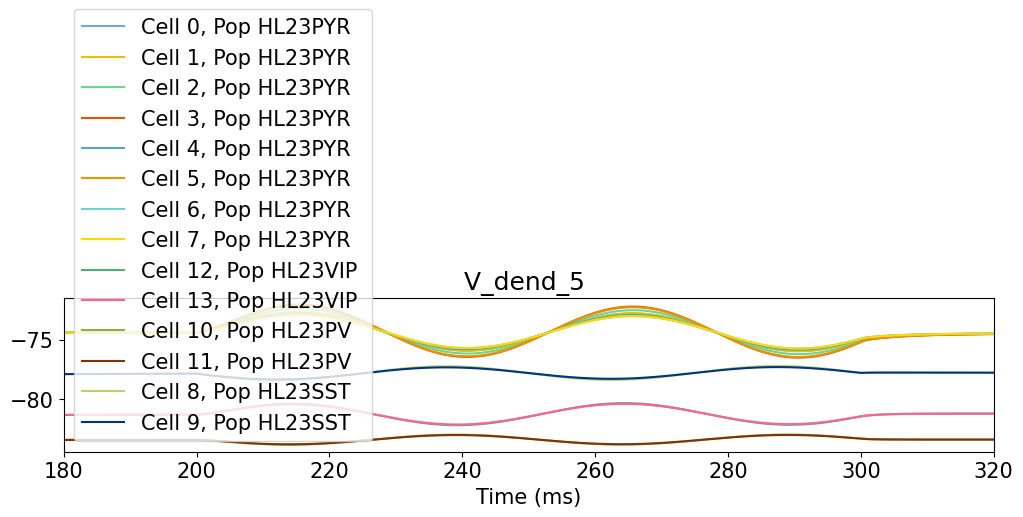

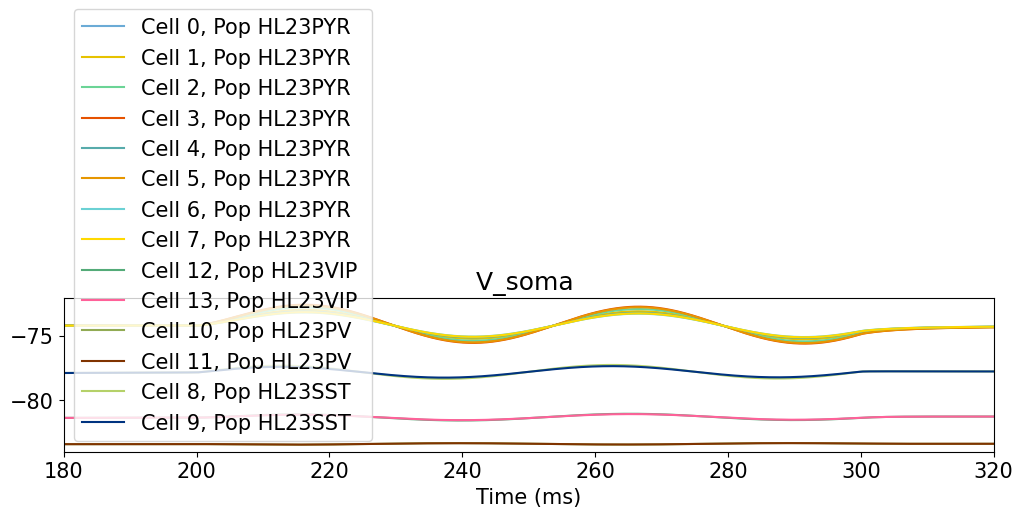

In [20]:
sim.analysis.plotTraces(overlay=True, timeRange=[180,cfg.duration], oneFigPer='trace', figSize=(12,2), fontSize=15, saveFig=False);

In [21]:
# for section in netParams.cellParams['HL23PYR_rule']['secLists']['all']:
#     print(section,'->',netParams.cellParams['HL23PYR_rule']['secs'][section]['topol']['parentSec'])
#     print(section,netParams.cellParams['HL23PYR_rule']['secs'][section]['geom']['diam'],netParams.cellParams['HL23PYR_rule']['secs'][section]['geom']['L'])

Plotting 2D representation of network cell locations and connections...


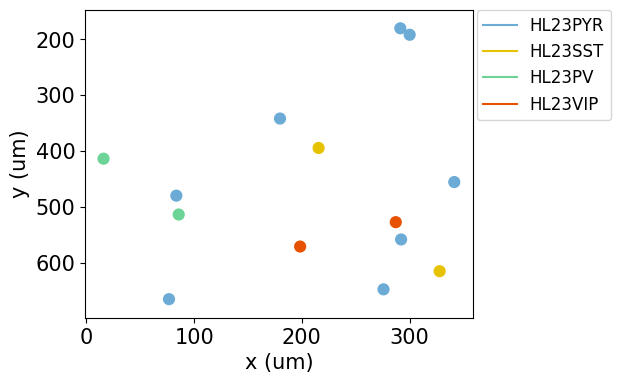

(<Figure size 500x400 with 1 Axes>,
 {'include': ['allCells'],
  'posX': [341.4519712546551,
   83.48829373947433,
   179.706897935423,
   291.3918131404288,
   292.10946080655805,
   300.06029864770727,
   275.77997726009613,
   76.66305967817134,
   215.5524758225436,
   327.8854334943679,
   15.91078167245639,
   85.69039158067228,
   287.1513201236485,
   198.3863197365747],
  'posY': [455.71615339627624,
   480.04605745446867,
   341.91469073740836,
   180.2188836401592,
   558.5228461736258,
   191.81791567140402,
   647.9040185836446,
   665.4910141012573,
   394.6168181150489,
   615.3872657795806,
   413.8505168803212,
   513.8650994609345,
   527.5473470544729,
   571.2266992501861],
  'posXpre': [],
  'posXpost': [],
  'posYpre': [],
  'posYpost': []})

In [22]:
sim.analysis.plot2Dnet(figSize=(5, 4), fontSize=12)

In [23]:
cd morphologies

/home/fernando/Dropbox/Human_L23_NetPyNE/morphologies


In [24]:
ls -li

total 4324
42210249 -rw-rw-r-- 1 fernando fernando 1983368 Apr 22  2021 HL23PV.swc
42210250 -rw-rw-r-- 1 fernando fernando  595681 Apr 22  2021 HL23PYR.swc
42210251 -rw-rw-r-- 1 fernando fernando 1275898 Apr 22  2021 HL23SST.swc
42210252 -rw-rw-r-- 1 fernando fernando  564769 Apr 22  2021 HL23VIP.swc


In [25]:
import neurom, scipy
from neurom import geom
from neurom import viewer
import os

from neuron import h
from neuron.units import mV, ms
import plotly
import plotly.graph_objects as go


h.load_file("import3d.hoc")
h.load_file("stdrun.hoc")


MorphoName = 'HL23PYR.swc'

# cellmorpho = h.Import3d_Neurolucida3()
# cellmorpho.input(MorphoName)
# i3d = h.Import3d_GUI(cellmorpho, False)
# i3d.instantiate(None)

# ps = h.PlotShape(False)
# ps.variable("v")
# ps.scale(-70, 40)
# fig = ps.plot(plotly, line={"width": 4})

# fig.show()

ImportError: cannot import name 'viewer' from 'neurom' (/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/neurom/__init__.py)

In [ ]:
orientation  = [ 3.1415-1.57,  3.1415-2.62 , 3.1415,  0.0]
position = [ 4069.81305387, -1280.39415027, -2311.99243699]

# orientation  = [ 1.57,  2.62, 0.0,  0.0]
# position = [ 4069.81305387, -1280.39415027, -2311.99243699]
position = [ 0.0, 0.0, 0.0]

In [ ]:
def transform_neuron(nrn_morph, orientation, position):
    rot = scipy.spatial.transform.Rotation.from_quat(orientation)
    rot = neurom.geom.transform.Rotation(rot.as_matrix())
    tl = neurom.geom.transform.Translation(position)
    return nrn_morph.transform(rot).transform(tl)
    
def load_neuron(transform=True):
    
    fn = 'HL23PYR.swc'
    
    nrn = neurom.load_morphology(fn)
    if transform:
        nrn = transform_neuron(nrn,  orientation, position)
    return nrn

nrn_morph = load_neuron(transform=True)
viewer.draw(nrn_morph, mode = '2d')
viewer.draw(nrn_morph, mode = '3d')

In [ ]:
viewer.draw(nrn_morph, mode = 'dendrogram')
